In [1]:
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array


https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files
train_healthy = "/content/drive/MyDrive/plantData/Train/Train/Healthy"
train_powdery = "/content/drive/MyDrive/plantData/Train/Train/Powdery"
train_rust = "/content/drive/MyDrive/plantData/Train/Train/Rust"

test_healthy = "/content/drive/MyDrive/plantData/Test/Test"
test_powdery = "/content/drive/MyDrive/plantData/Test/Test/Powdery"
test_rust = "/content/drive/MyDrive/plantData/Test/Test/Rust"

valid_healthy = "/content/drive/MyDrive/plantData/Validation/Validation/Healthy"
valid_powdery = "/content/drive/MyDrive/plantData/Validation/Validation/Powdery"
valid_rust = "/content/drive/MyDrive/plantData/Validation/Validation/Rust"

In [6]:
print("Number of healthy leaf images in training set", total_files(train_healthy))
print("Number of powder leaf images in training set", total_files(train_powdery))
print("Number of rusty leaf images in training set", total_files(train_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_healthy))
print("Number of powder leaf images in test set", total_files(test_powdery))
print("Number of rusty leaf images in test set", total_files(test_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_healthy))
print("Number of powder leaf images in validation set", total_files(valid_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 0
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


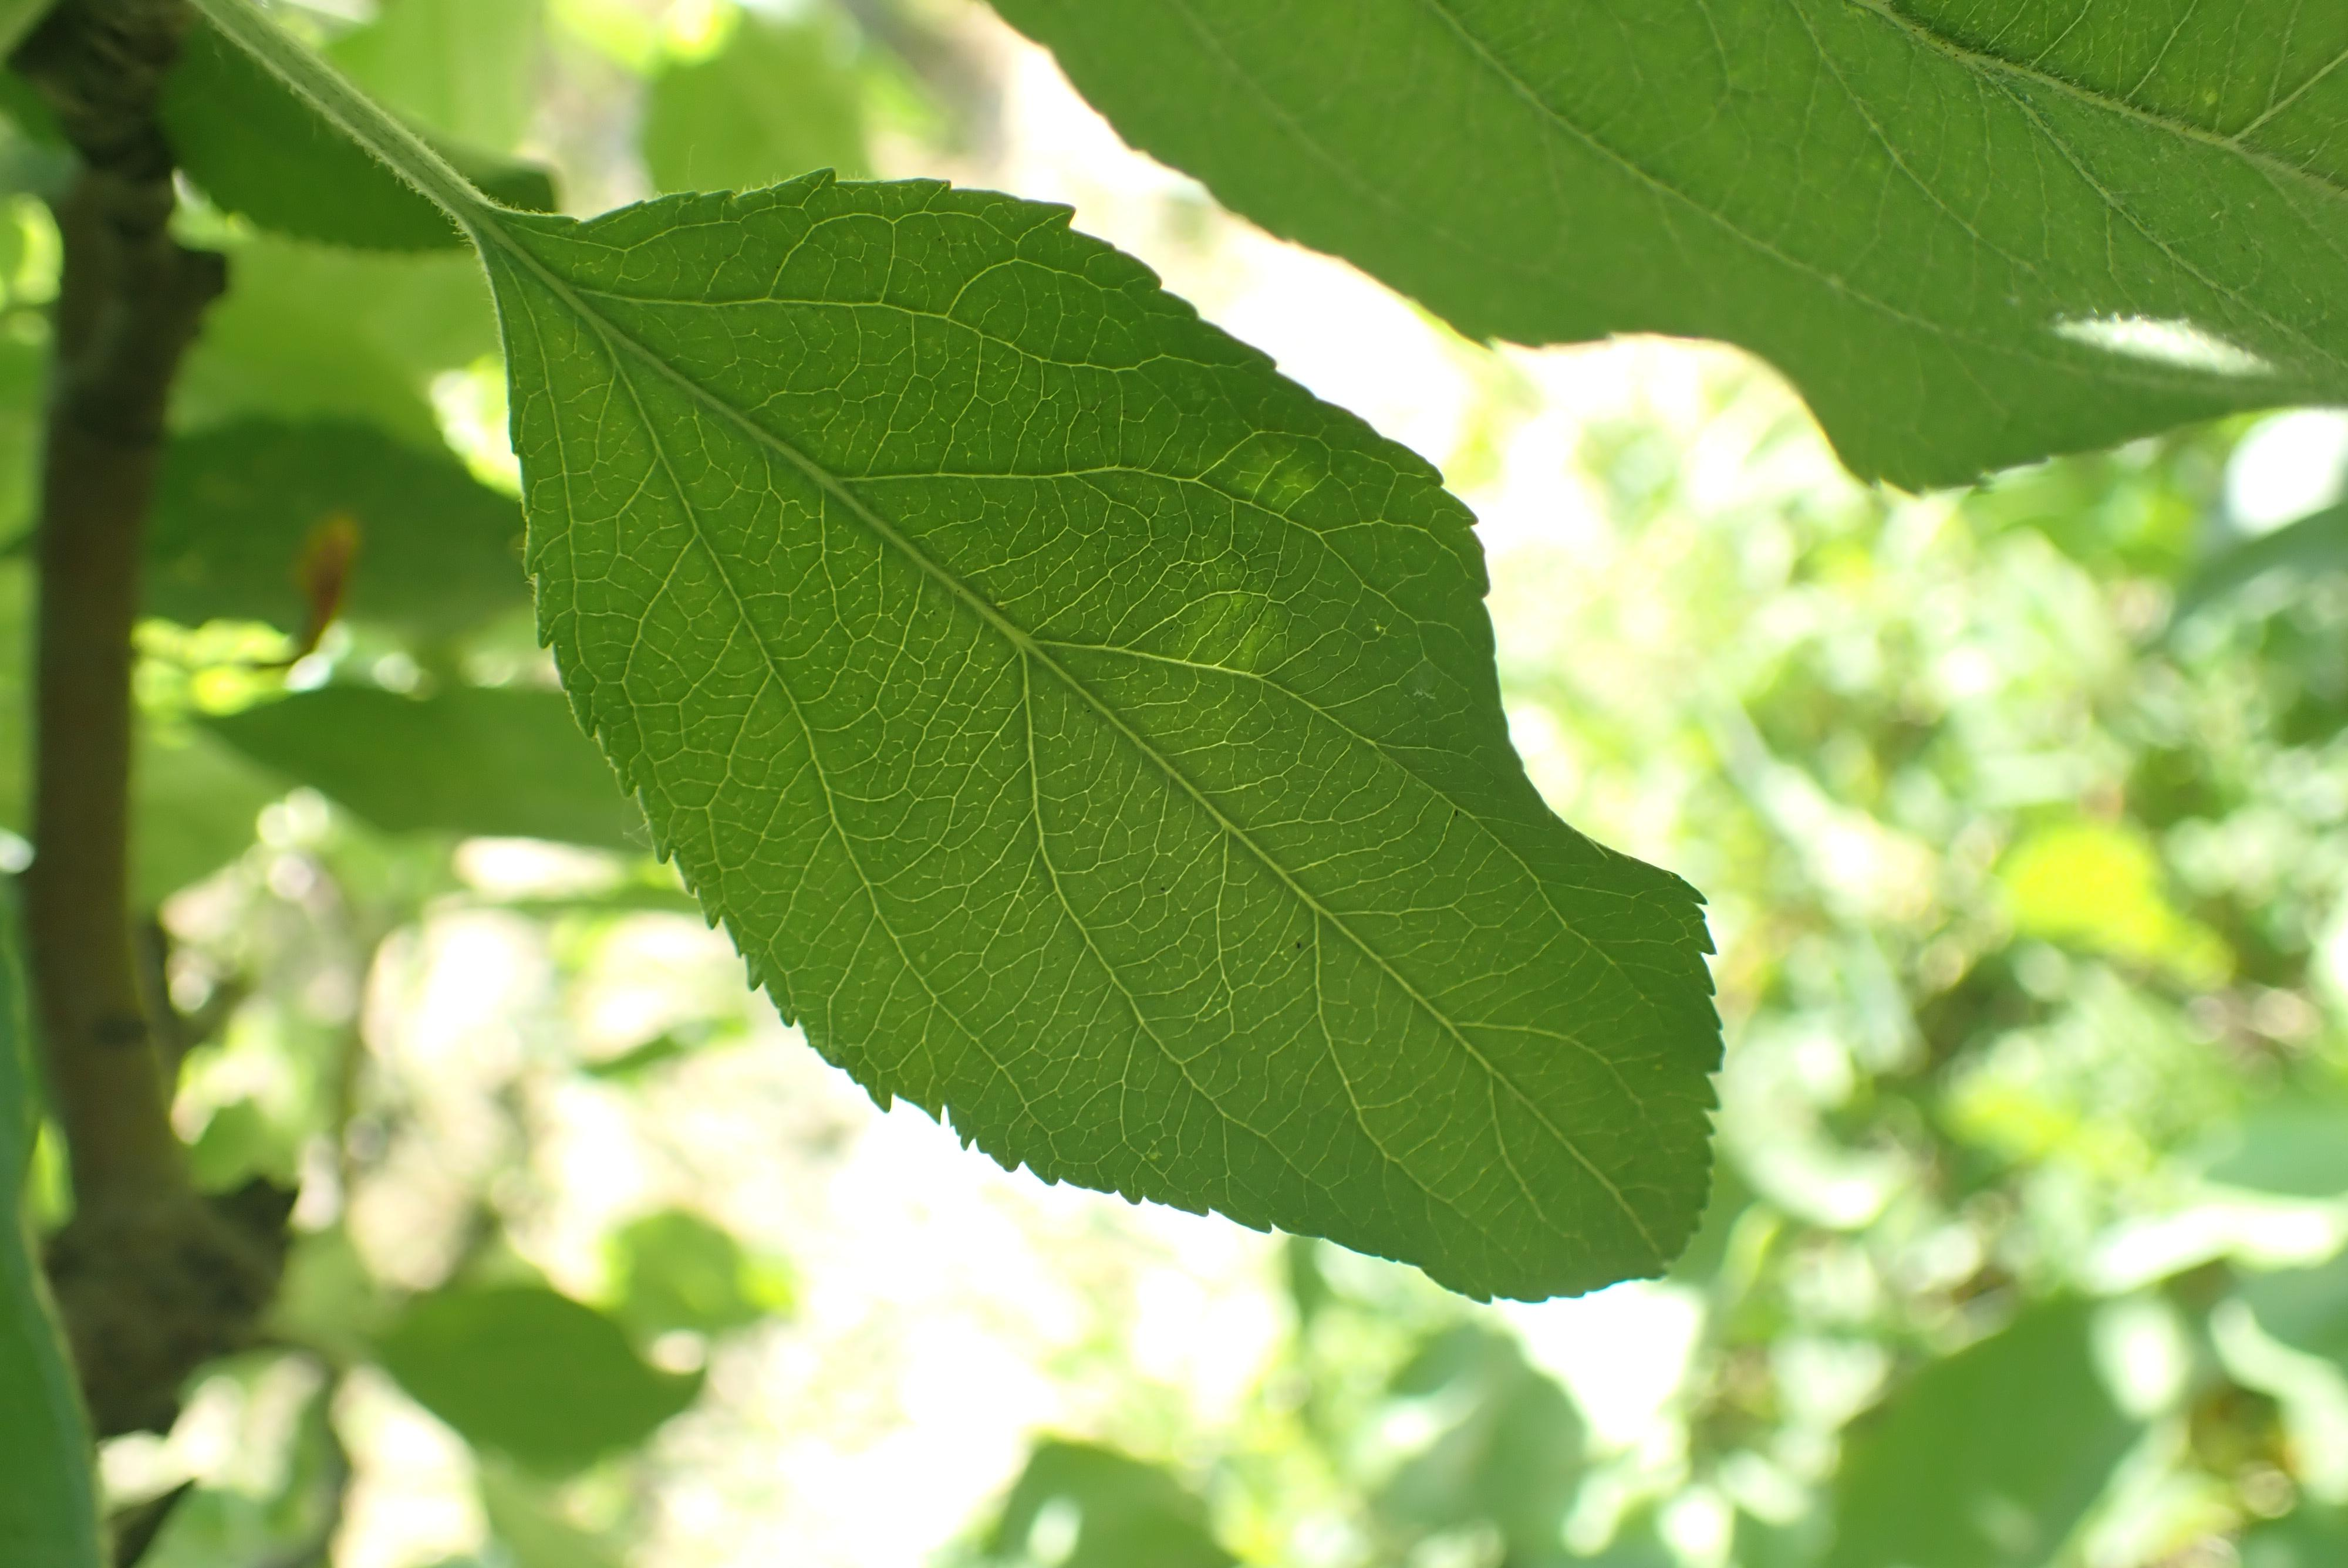

In [7]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/plantData/Train/Train/Healthy/803bcb65f486e39a.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

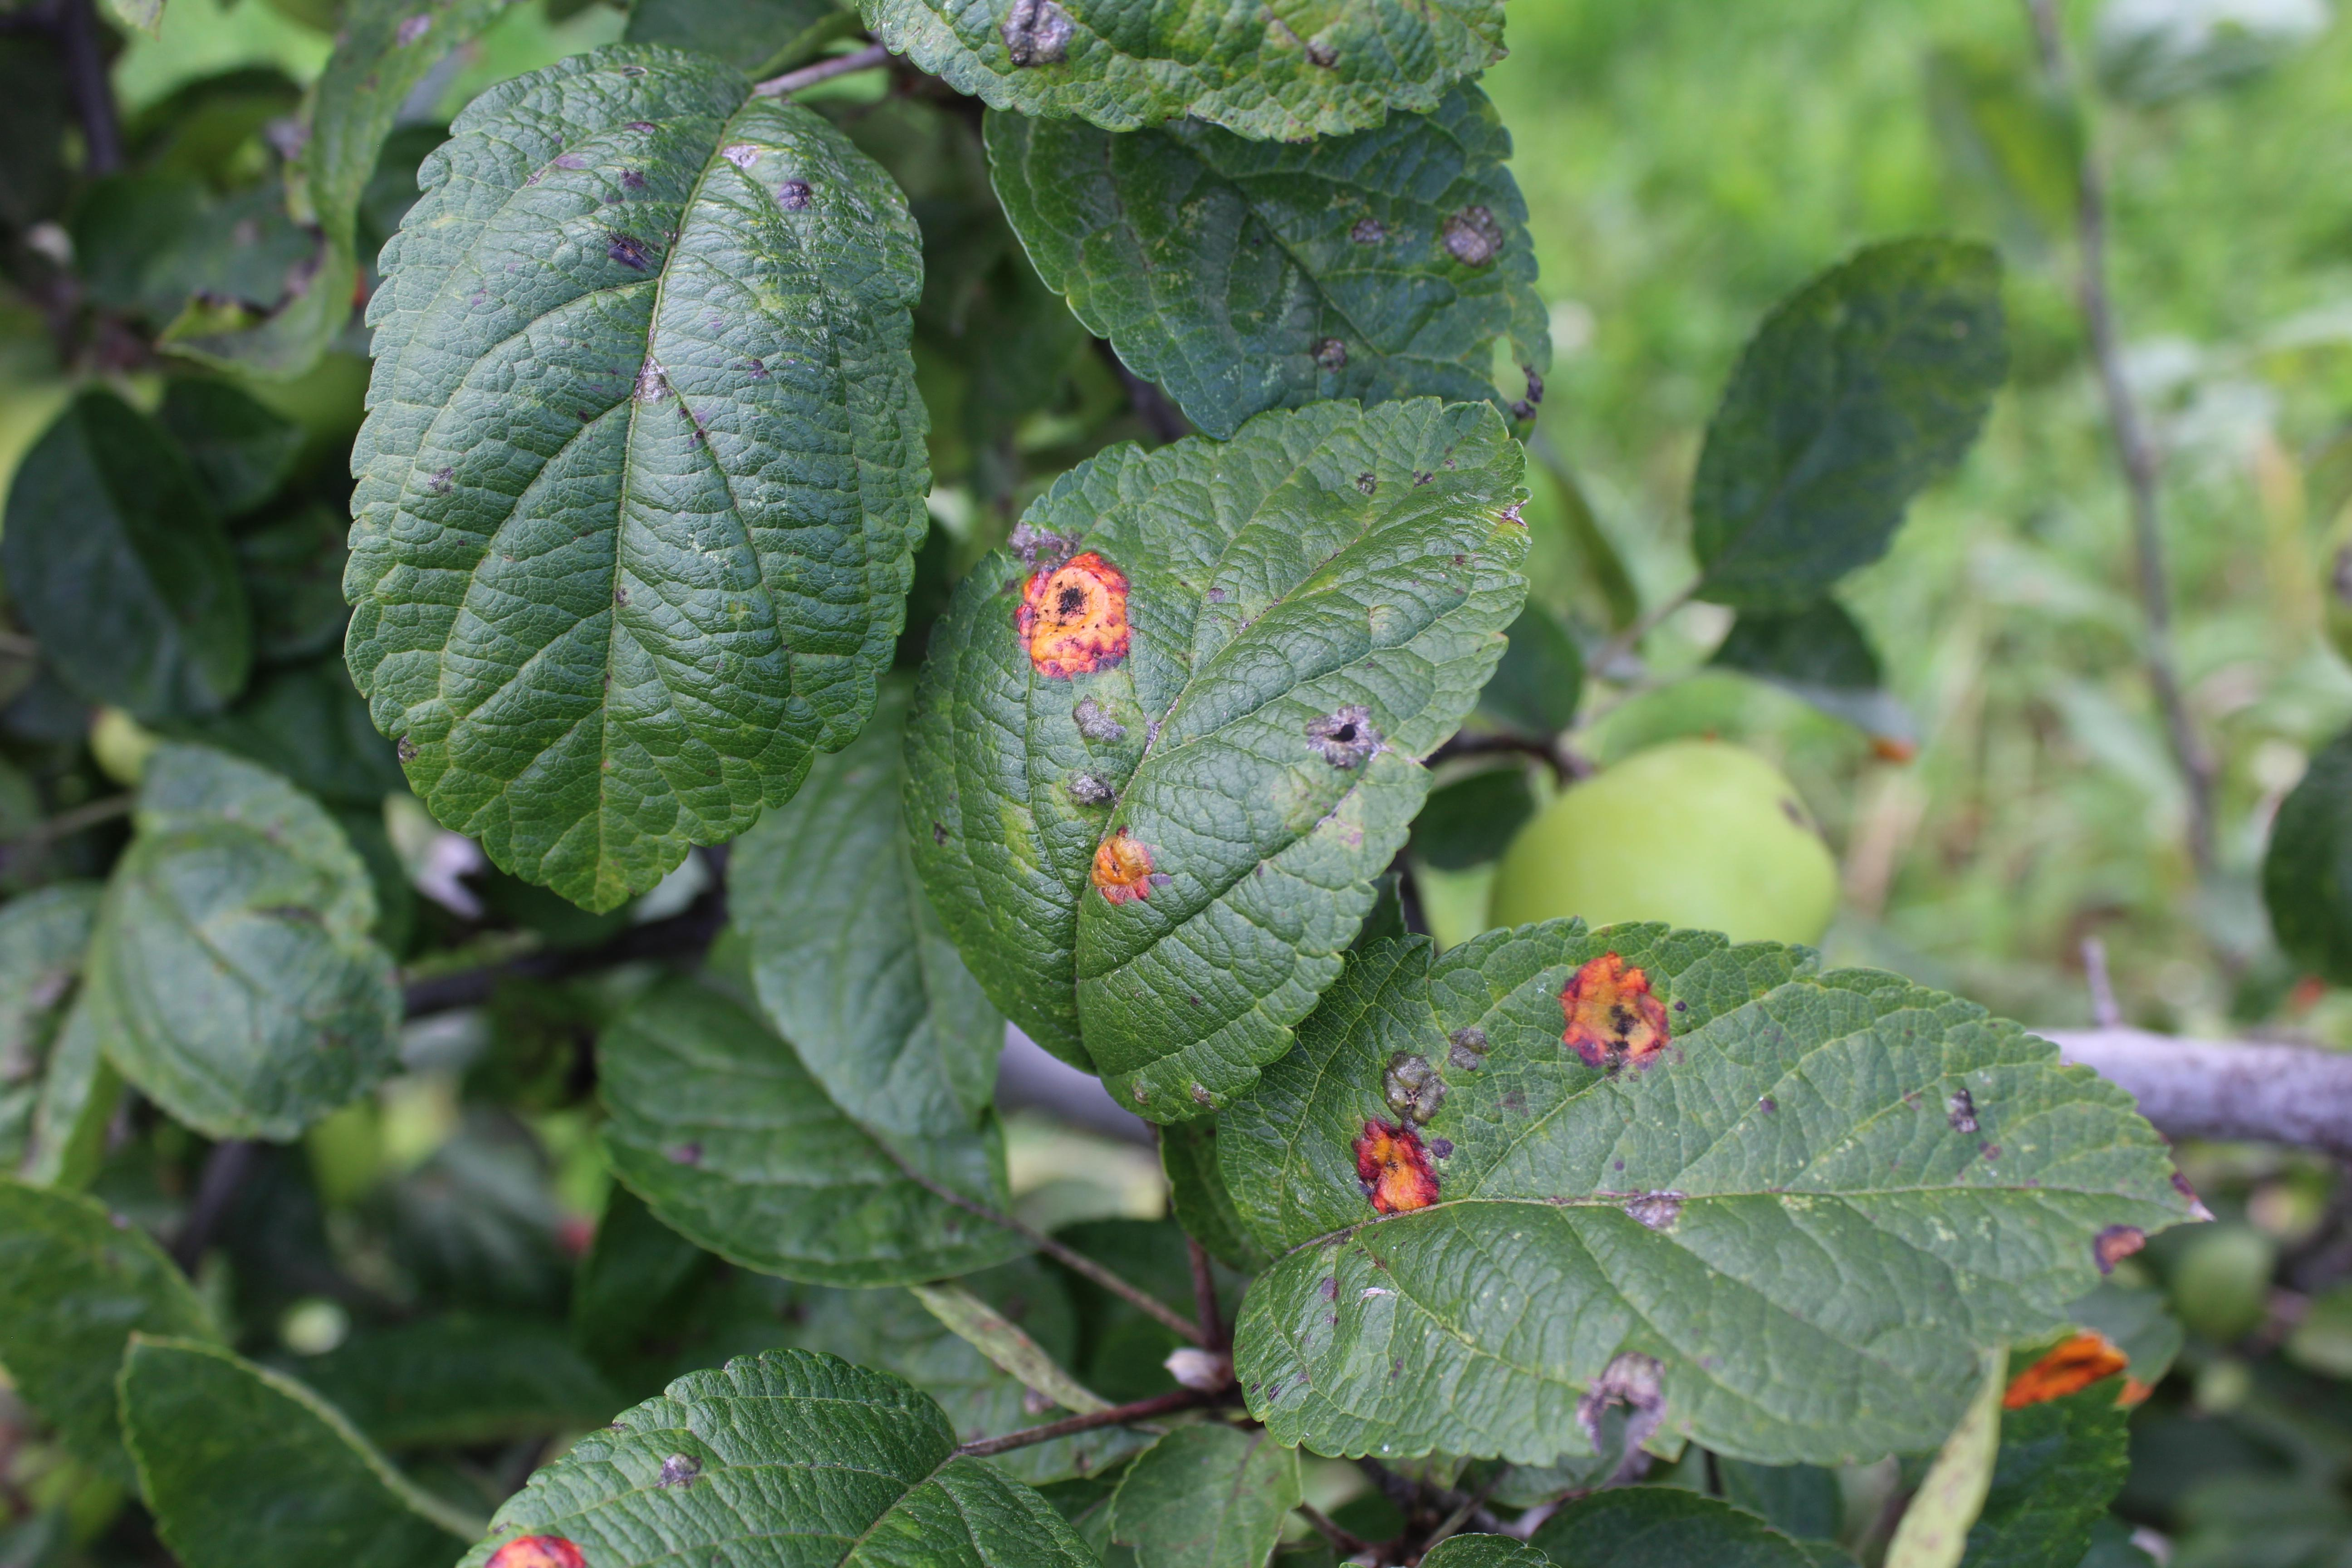

In [8]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/plantData/Train/Train/Rust/81a063b69c99ed9e.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/plantData/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/plantData/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=4,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/4
42/42 [==============================] - 516s 12s/step - loss: 1.4093 - accuracy: 0.5227 - val_loss: 0.6794 - val_accuracy: 0.7000
Epoch 2/4
42/42 [==============================] - 217s 5s/step - loss: 0.4456 - accuracy: 0.8381 - val_loss: 0.4922 - val_accuracy: 0.8000
Epoch 3/4
42/42 [==============================] - 202s 5s/step - loss: 0.2893 - accuracy: 0.8971 - val_loss: 0.4685 - val_accuracy: 0.8000
Epoch 4/4
42/42 [==============================] - 208s 5s/step - loss: 0.3020 - accuracy: 0.8933 - val_loss: 0.4199 - val_accuracy: 0.8167


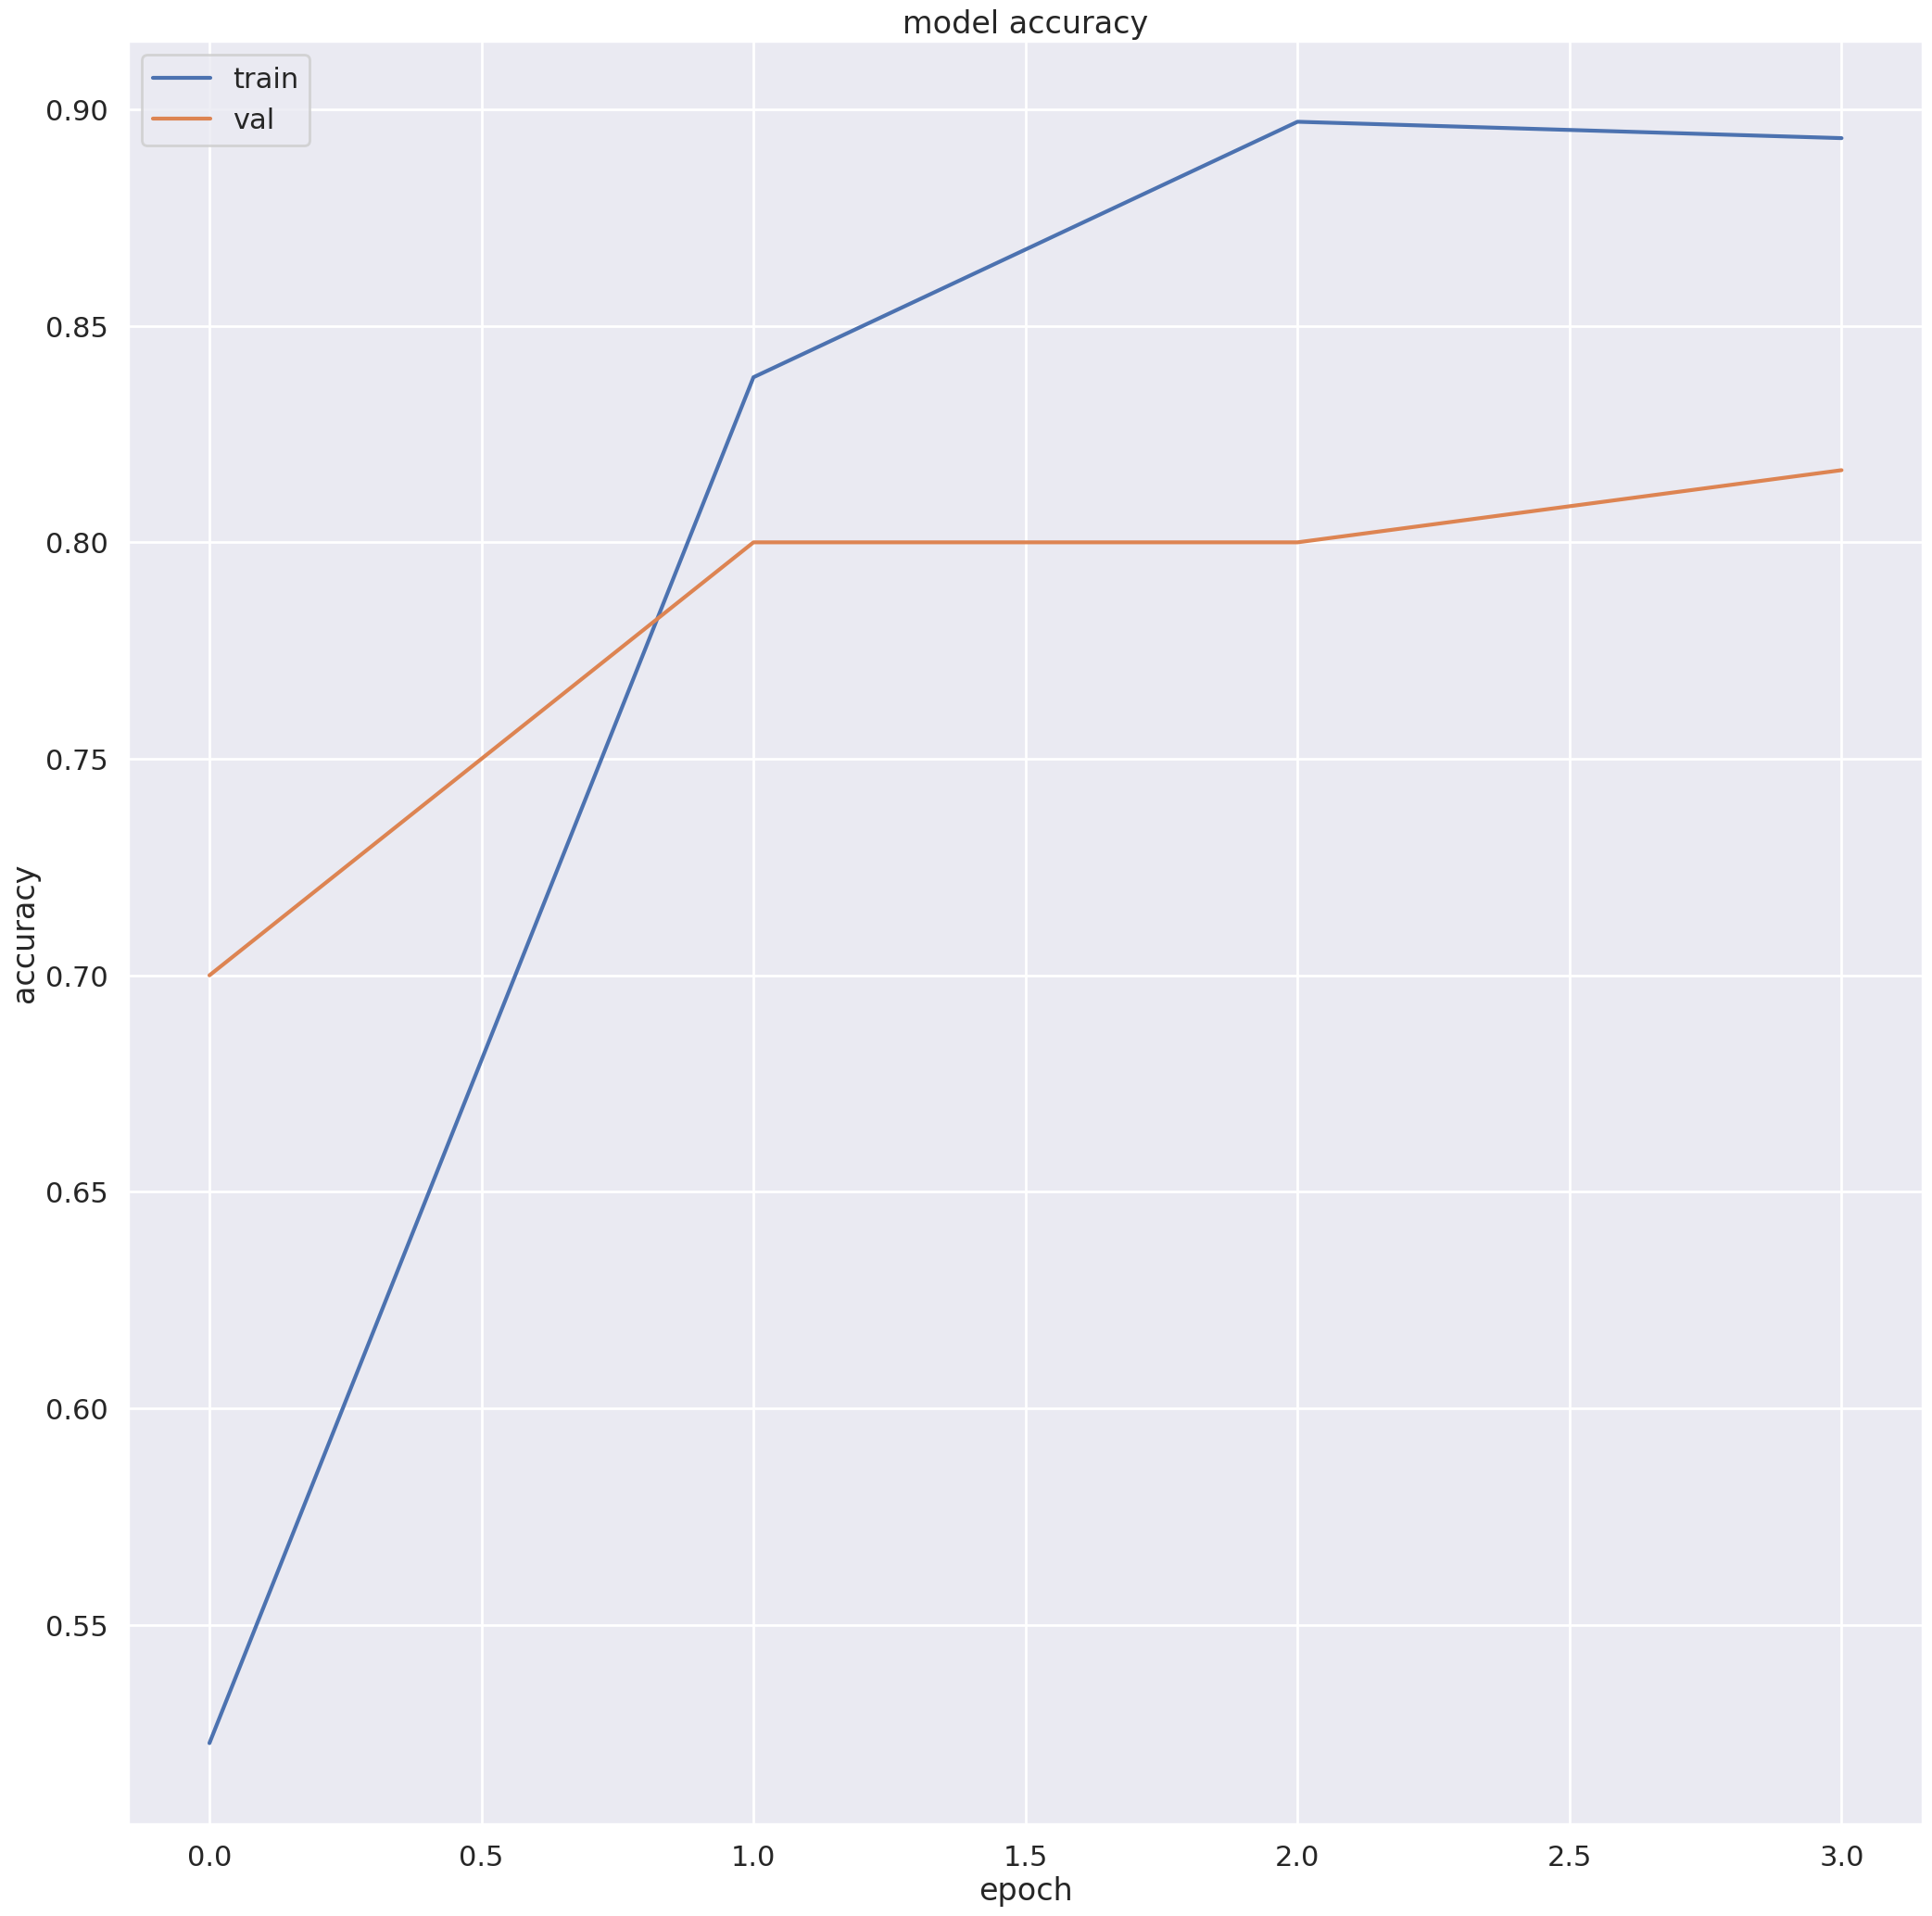

In [17]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/plantData/Train/Train/Rust/8161733dfc3c1c65.jpg')
x

array([[[[0.07843138, 0.11372549, 0.04705882],
         [0.10196079, 0.15294118, 0.08235294],
         [0.16078432, 0.28235295, 0.15686275],
         ...,
         [0.33333334, 0.5019608 , 0.32156864],
         [0.31764707, 0.49803922, 0.3137255 ],
         [0.29411766, 0.48235294, 0.28627452]],

        [[0.09803922, 0.12941177, 0.08627451],
         [0.09803922, 0.16470589, 0.10196079],
         [0.17254902, 0.28235295, 0.19215687],
         ...,
         [0.38431373, 0.54509807, 0.37254903],
         [0.3764706 , 0.54509807, 0.3647059 ],
         [0.34117648, 0.52156866, 0.32941177]],

        [[0.09411765, 0.13333334, 0.10196079],
         [0.10196079, 0.17254902, 0.1254902 ],
         [0.19607843, 0.30588236, 0.21960784],
         ...,
         [0.39607844, 0.54901963, 0.3764706 ],
         [0.4       , 0.57254905, 0.38039216],
         [0.39607844, 0.5686275 , 0.3764706 ]],

        ...,

        [[0.09803922, 0.16862746, 0.07450981],
         [0.08627451, 0.15686275, 0.07058824]

In [20]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 393ms/step


array([0.00181319, 0.00203049, 0.9961563 ], dtype=float32)

In [21]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [22]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import os


# Placeholder function for the ML model prediction
def predict_image(image_path):
    # Here you would load your model and make a prediction
    # For demonstration, this is a dummy function that prints the image path
    print(f"Predicting for the image: {image_path}")
    predictions = model.predict(preprocess_image(image_path))

    labels = train_generator.class_indices
    labels = {v: k for k, v in labels.items()}

    predicted_label = labels[np.argmax(predictions)]
    print(predicted_label)
    test = predicted_label

    # Display the name on the label
    label.config(text=test)

# Load an image and display it in the GUI
def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:  # Ensure a file path was selected
        img = Image.open(file_path)
        img.thumbnail((250, 250))  # Resize image to fit the display
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img  # Keep a reference so it's not garbage collected
        image_label.file_path = file_path  # Save the file path for prediction

# GUI setup
root = tk.Tk()
root.title("Image Classifier")

# Create and pack the image label
image_label = tk.Label(root)
image_label.pack()

# Create and pack buttons
add_image_button = tk.Button(root, text="Add Image", command=load_image)
add_image_button.pack()

predict_button = tk.Button(root, text="Predict", command=lambda: predict_image(image_label.file_path))
predict_button.pack()

# Create a display label
label = tk.Label(root, text="CLASS", font=("Arial", 24))
label.pack()


root.mainloop()


Predicting for the image: C:/Users/Nishigandha/Desktop/DL/fashion/healthy4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Healthy


In [ ]:
import os
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


# Dictionary mapping class indices to class labels
labels = {0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

# Function to preprocess the uploaded image
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Function to predict the class of the uploaded image
def predict_image(image_path):
    # Preprocess the image
    x = preprocess_image(image_path)
    # Make predictions
    predictions = model.predict(x)
    # Get the predicted class label
    predicted_label = labels[np.argmax(predictions)]
    return predicted_label, x

# Function to upload an image and make predictions
def upload_and_predict():
    file_path = input("Enter the path of the image you want to predict: ")
    if os.path.exists(file_path):
        predicted_label, x = predict_image(file_path)
        print("Predicted class:", predicted_label)
        # Display the image
        display_image(x)
    else:
        print("File not found.")

# Function to display the image
def display_image(x):
    plt.imshow(x.squeeze())
    plt.axis('off')
    plt.show()

# Main function to run the program
def main():
    print("Welcome to the image classifier!")
    while True:
        print("\nOptions:")
        print("1. Upload and predict an image")
        print("2. Exit")
        choice = input("Enter your choice: ")
        if choice == '1':
            upload_and_predict()
        elif choice == '2':
            print("Exiting program.")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


Welcome to the image classifier!

Options:
1. Upload and predict an image
2. Exit
Enter your choice: 
Invalid choice. Please try again.

Options:
1. Upload and predict an image
2. Exit
